In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import OrderedDict, Counter

path = '../data/'

plt.style.use('default')
plt.rcParams['font.family'] = 'Helvetica'
matplotlib.rcParams['font.size'] = 10.5

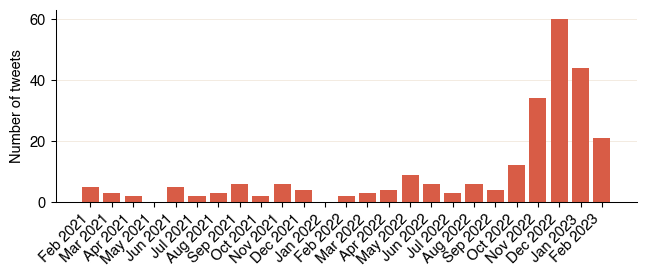

In [2]:
data_um = pd.read_csv(path + 'responses_unimodal.csv', dtype=str)
data_mm = pd.read_csv(path + 'responses_multimodal.csv', dtype=str)

month_mapping = OrderedDict({
    '01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', '06': 'Jun',
    '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec',
})

dates = [d[:7] for d in data_um['created_time']] + [d[:7] for d in data_mm['created_time']]

dates2 = []
for date in dates:
    year, month = date.split('-')[0], month_mapping[date.split('-')[1]]
    dates2.append(month + ' ' + year)

data_plot = OrderedDict({})
for year in ['2021', '2022', '2023']:
    for month in month_mapping.values():
        if year == '2021' and month == 'Jan':
            continue
        if year == '2023' and month not in ['Jan', 'Feb']:
            continue
        data_plot[month + ' ' + year] = Counter(dates2)[month + ' ' + year]

fig, ax = plt.subplots(figsize=(7.5, 2.5))
plt.bar(x=data_plot.keys(), height=data_plot.values(), color='#D85C46')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of tweets")
plt.setp(ax.spines.values(), color='k', linewidth=0.75)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_tick_params(width=0.75)
ax.set_axisbelow(True)
ax.grid(axis='y', color='#F3EBE1', linewidth=0.7)